<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-neto71/blob/main/Reduccion_dimensiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Actividad Semanal -- 5 Repaso Transformación y reducción de dimensiones**

**Nombre :** Ernesto Nicanor Santillán Guerrero 


**Matricula :** A01793675



**Materia:** Ciencia y analítica de datos

**Profesor:** María de la Paz Rico Fernández

**Fecha:** 27 de Octubre de 2022

# Bienvenido al notebook
#Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# Ejercicio 1, Descomposición y composición
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




# Eigenvalores y eigenvectores

In [2]:
###-----------------EJEMPLO DE EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig
# define la matriz
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

print("-------Matriz original-------")
print(A)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción
values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
B = W@D@Winv 
print(B)
print("-----------------------------")

-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
-------Matriz reconstruida-------
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
-----------------------------


In [3]:
A = array([[3, 0, 2], [3, 0, -2], [0, 1, 1]])
values, vectors = eig(A)
print(values) #D
print(vectors) #W

[3.54451153+0.j         0.22774424+1.82582815j 0.22774424-1.82582815j]
[[-0.80217543+0.j         -0.04746658+0.2575443j  -0.04746658-0.2575443j ]
 [-0.55571339+0.j          0.86167879+0.j          0.86167879-0.j        ]
 [-0.21839689+0.j         -0.16932106-0.40032224j -0.16932106+0.40032224j]]


#Definimos la Matriz

In [18]:
#Matriz 1
# define la matriz
A = array([[3, 0, 2], [3, 0, -2], [0, 1, 1]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")

-------Matriz original-------
[[ 3  0  2]
 [ 3  0 -2]
 [ 0  1  1]]
-----------------------------


# calcula la eigendescomposición

In [19]:
# calcula la eigendescomposición
values, vectors = np.linalg.eig(A)
print(f"eigenvalores : {values}") #D
print(f"eigenvectores : {vectors} ") #W
print("\n")


eigenvalores : [3.54451153+0.j         0.22774424+1.82582815j 0.22774424-1.82582815j]
eigenvectores : [[-0.80217543+0.j         -0.04746658+0.2575443j  -0.04746658-0.2575443j ]
 [-0.55571339+0.j          0.86167879+0.j          0.86167879-0.j        ]
 [-0.21839689+0.j         -0.16932106-0.40032224j -0.16932106+0.40032224j]] 




## Como se puede ver esta matriz cuenta con eigenvalores y eigenvectores con parte real e imaginaria

# Generamos reconstrucción
* Matriz recosnstruida igual a $WDW^{-1}$
* Donde W es matriz formada por los eigenvectores de matriz original
* D matrix diagonal, con los eigenvalores en la diagonal
* $W^{-1}$ la inversa de W

In [20]:
#Generamos reconstrucción

W = vectors
#W= np.real_if_close(W, tol=.01)
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
B = W@D@Winv 
print(B)


-------Matriz reconstruida-------
[[ 3.00000000e+00+1.12272023e-16j  3.36536354e-16-9.67833078e-17j
   2.00000000e+00-3.95053829e-17j]
 [ 3.00000000e+00-1.66253281e-16j  9.99200722e-16+1.12958209e-16j
  -2.00000000e+00+2.77350775e-17j]
 [ 1.11022302e-16+1.03283117e-18j  1.00000000e+00-7.61630485e-17j
   1.00000000e+00+1.02438275e-16j]]


# como se puede ver la matriz es casi igual, pero arrojo una parte imaginaria pequeña. Esto debido a la manera que el algoritmo de Numpy calcula los eigenvalores 

### La siguiente función toma una entrada compleja
## si la parte imaginaria es cercana a 0, regresa solo
## la parte real

In [21]:
np.real_if_close(B)

array([[ 3.00000000e+00,  3.36536354e-16,  2.00000000e+00],
       [ 3.00000000e+00,  9.99200722e-16, -2.00000000e+00],
       [ 1.11022302e-16,  1.00000000e+00,  1.00000000e+00]])

## La siguiente función np.isclos(A,B) mide que tan cercanas las matrices dentro de una tolerancia predeterminado. 

In [22]:
np.isclose(A,B)

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

## Como ya validamos que son matrices iguales (dentro de una tolerancia), podemos proceder a redondear y solo mostrar parte real.

In [23]:
np.round(B).real

array([[ 3.,  0.,  2.],
       [ 3.,  0., -2.],
       [ 0.,  1.,  1.]])

In [24]:
#Matriz 2
# define la matriz
A1 = array([[1, 3, 8], [2, 0, 0], [0, 0, 1]])
print("-------Matriz original-------")
print(A1)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = np.linalg.eig(A1)
print(f"eigenvalores : {values}") #D
print(f"eigenvectores : {vectors} ") #W
print("\n")

#Ejemplo de reconstrucción

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
B = W@D@Winv 
print(B)
print("-----------------------------")


-------Matriz original-------
[[1 3 8]
 [2 0 0]
 [0 0 1]]
-----------------------------
eigenvalores : [ 3. -2.  1.]
eigenvectores : [[ 0.83205029 -0.70710678 -0.42399915]
 [ 0.5547002   0.70710678 -0.8479983 ]
 [ 0.          0.          0.31799936]] 


-------Matriz reconstruida-------
[[1.00000000e+00 3.00000000e+00 8.00000000e+00]
 [2.00000000e+00 7.41483138e-17 7.08397389e-16]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
-----------------------------


In [25]:
#Matriz 3
# define la matriz
A2 = array([[5, 4, 0], [1, 0, 1], [10, 7, 1]])
print("-------Matriz original-------")
print(A2)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = np.linalg.eig(A2)
print(f"eigenvalores : {values}") #D
print(f"eigenvectores : {vectors} ") #W
print("\n")

#Ejemplo de reconstrucción

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
B = W@D@Winv 
print(B)
print("-----------------------------")



-------Matriz original-------
[[ 5  4  0]
 [ 1  0  1]
 [10  7  1]]
-----------------------------
eigenvalores : [ 6.89167094 -0.214175   -0.67749594]
eigenvectores : [[ 0.3975395   0.55738222  0.57580768]
 [ 0.18800348 -0.72657211 -0.81728644]
 [ 0.89811861 -0.40176864 -0.02209943]] 


-------Matriz reconstruida-------
[[ 5.00000000e+00  4.00000000e+00 -1.53912019e-15]
 [ 1.00000000e+00 -1.30389602e-15  1.00000000e+00]
 [ 1.00000000e+01  7.00000000e+00  1.00000000e+00]]
-----------------------------


**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



#Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


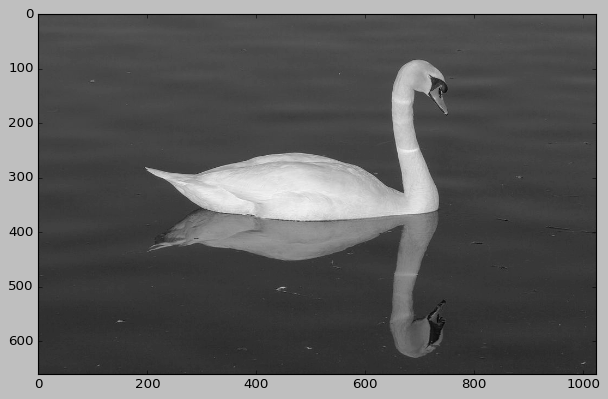

<PIL.Image.Image image mode=LA size=1024x660 at 0x7F699B756990>


In [32]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [23]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape


(660, 1024)

In [24]:
U.shape

(660, 660)

In [25]:
V.shape

(1024, 1024)

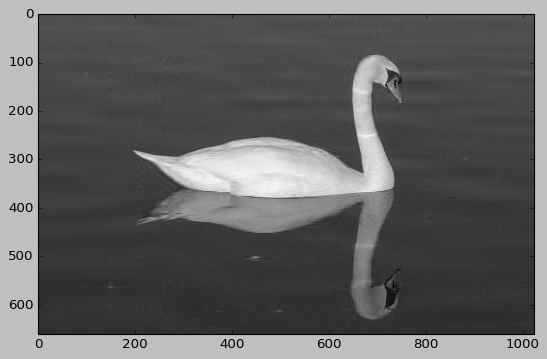

Felicidades la imagen está comprimida


In [26]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 50
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

¡Ahora es tu turno!, comprime 3 imagenes

[161. 161. 161. ... 190. 190. 190.]


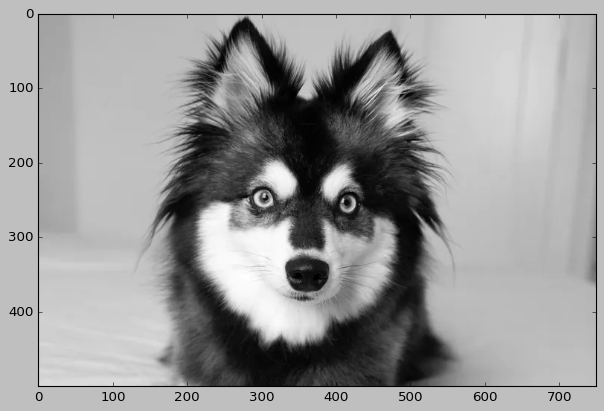

<PIL.Image.Image image mode=LA size=750x500 at 0x7F699B5D4D90>


In [57]:
#imagen 1
img1 = Image.open(urllib.request.urlopen('https://www.thesprucepets.com/thmb/0jlxxPucQ-r9LWZT9DF_HkFy-bw=/750x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/dog-breeds-with-blue-eyes-5089039-hero-4991907e72cc445db444f336d51f4c0a.jpg')).convert('LA')
imggray1 = img1.convert('LA')
imgmat1 = np.array(list(imggray1.getdata(band=0)),float)
print(imgmat1)

imgmat1.shape = (imggray1.size[1],imggray1.size[0])
plt.figure(figsize=(9,6))
plt.imshow(imgmat1,cmap='gray')
plt.show()
print(img1)


In [67]:
U1,D1,V1 = np.linalg.svd(imgmat1)
print(f" tamaño imagen : {imgmat1.shape}, tamaño matriz U1 : {U1.shape}, tamaño matriz V1 : {V1.shape}")

 tamaño imagen : (500, 750), tamaño matriz U1 : (500, 500), tamaño matriz V1 : (750, 750)


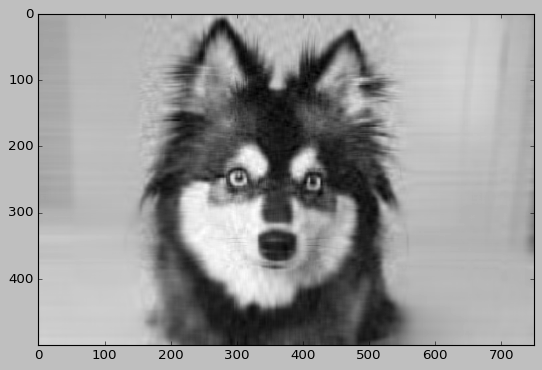

Felicidades la imagen está comprimida


In [72]:
nvalue = 25
#------------------------------
reconstimg1 = np.matrix(U1[:,:nvalue])*np.diag(D1[:nvalue])*np.matrix(V1[:nvalue,:])
#Observr las dimensiones de la imagen y su descomposicion
#500x750= U(500X500)D(500X750)V(750x750)
        #=U(500Xnvalues)D(nvaluesXnvalue)V(nvaluesx750)
        #=U(500X25)(25X25)(25X750)
plt.imshow(reconstimg1,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

[48. 37. 33. ... 70. 67. 73.]


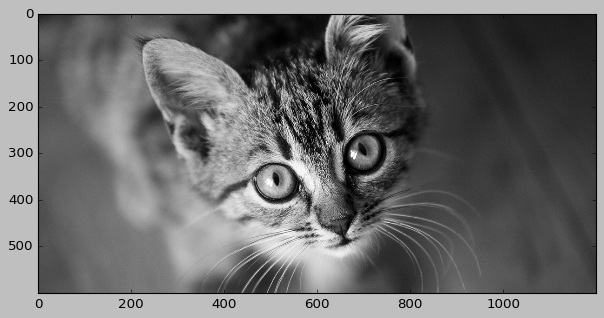

<PIL.Image.Image image mode=LA size=1200x600 at 0x7F699B523610>


In [73]:
#imagen 2
img2 = Image.open(urllib.request.urlopen('https://icatcare.org/app/uploads/2018/07/Thinking-of-getting-a-cat.png')).convert('LA')
imggray2 = img2.convert('LA')
imgmat2 = np.array(list(imggray2.getdata(band=0)),float)
print(imgmat2)

imgmat2.shape = (imggray2.size[1],imggray2.size[0])
plt.figure(figsize=(9,6))
plt.imshow(imgmat2,cmap='gray')
plt.show()
print(img2)

In [74]:
U2,D2,V2 = np.linalg.svd(imgmat2)
print(f" tamaño imagen : {imgmat2.shape}, tamaño matriz U2 : {U2.shape}, tamaño matriz V2 : {V2.shape}")

 tamaño imagen : (600, 1200), tamaño matriz U2 : (600, 600), tamaño matriz V2 : (1200, 1200)


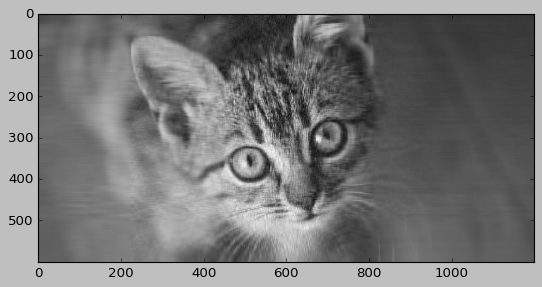

Felicidades la imagen está comprimida


In [75]:
nvalue = 35
#------------------------------
reconstimg2 = np.matrix(U2[:,:nvalue])*np.diag(D2[:nvalue])*np.matrix(V2[:nvalue,:])
#Observr las dimensiones de la imagen y su descomposicion
#600x1200= U(600X600)D(600X1200)V(1200x1200)
        #=U(600Xnvalues)D(nvaluesXnvalue)V(nvaluesx1200)
        #=U(600X35)(35X35)(35X1200)
plt.imshow(reconstimg2,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

[135. 136. 136. ... 137. 137. 138.]


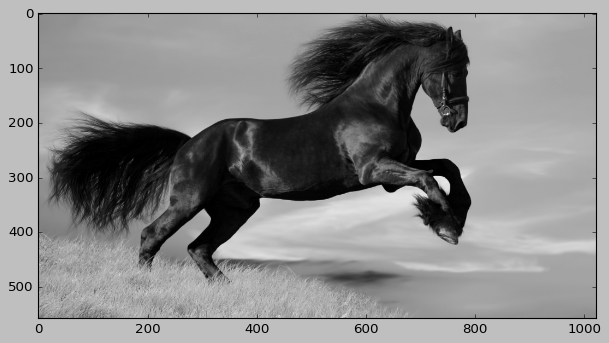

<PIL.Image.Image image mode=LA size=1022x557 at 0x7F699B51FF50>


In [79]:
#imagen 3
img3 = Image.open(urllib.request.urlopen('https://www.zotal.com/wp-content/uploads/2019/08/razascaballos.png')).convert('LA')
imggray3 = img3.convert('LA')
imgmat3 = np.array(list(imggray3.getdata(band=0)),float)
print(imgmat3)

imgmat3.shape = (imggray3.size[1],imggray3.size[0])
plt.figure(figsize=(9,6))
plt.imshow(imgmat3,cmap='gray')
plt.show()
print(img3)

In [80]:
U3,D3,V3 = np.linalg.svd(imgmat3)
print(f" tamaño imagen : {imgmat3.shape}, tamaño matriz U3 : {U3.shape}, tamaño matriz V3 : {V3.shape}")

 tamaño imagen : (557, 1022), tamaño matriz U3 : (557, 557), tamaño matriz V3 : (1022, 1022)


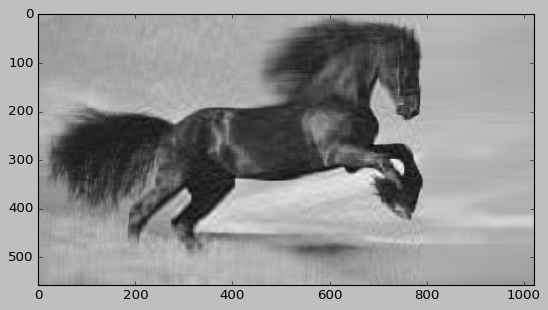

Felicidades la imagen está comprimida


In [85]:
nvalue = 30
#------------------------------
reconstimg3 = np.matrix(U3[:,:nvalue])*np.diag(D3[:nvalue])*np.matrix(V3[:nvalue,:])
#Observr las dimensiones de la imagen y su descomposicion
#600x1200= U(600X600)D(600X1200)V(1200x1200)
        #=U(600Xnvalues)D(nvaluesXnvalue)V(nvaluesx1200)
        #=U(600X35)(35X35)(35X1200)
plt.imshow(reconstimg3,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

* Usar SVD es una tecnica rapida y poderosa para comprimir imagenes. En el articulo de (Kahu et.al, 2013) explica el principio basico que se utiliza.
* La transformación lineal de SVD genera 3 matrices
* X =$UDV^{T}$
* La matriz D, es una matriz diagonal con los valores singulares de la
* matriz X. Los valores singulares van de mayor a menor en la diagonal.
* Similar a PCA el primer valor contiene mas informacion de la imagen y asi
* sucesivamente.

# Ejercicio 3

**Feature importances**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e




In [26]:
#tu codigo aqui
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')
# Load the data
iris = datasets.load_iris()
X = iris.data
y = iris.target
# Z-score the features
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
# The PCA model
pca = PCA(n_components=2) # estimate only 2 PCs
X_new = pca.fit_transform(X) # project the original data into the PCA space

In [35]:
X.shape

(150, 4)

In [34]:
list(iris.feature_names)

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

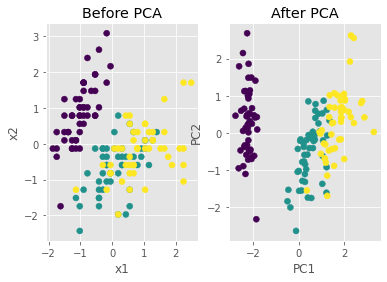

In [27]:
fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

Describe lo relevante del ejercicio y que descubriste de las variables análizadas. 

In [89]:
print(pca.explained_variance_ratio_)


[0.72962445 0.22850762]


In [91]:
np.cov(X_new.T)


array([[2.93808505e+00, 5.33928780e-16],
       [5.33928780e-16, 9.20164904e-01]])

In [93]:
pca.explained_variance_

array([2.93808505, 0.9201649 ])

In [95]:
print(abs( pca.components_ ))


[[0.52106591 0.26934744 0.5804131  0.56485654]
 [0.37741762 0.92329566 0.02449161 0.06694199]]


In [96]:
def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

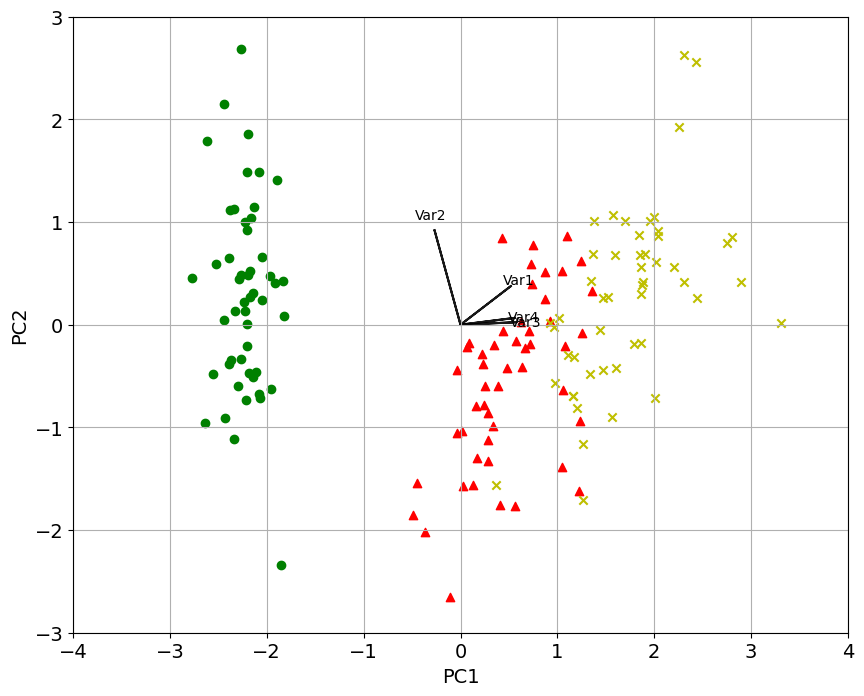

In [97]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) # reset ggplot style
# Call the biplot function for only the first 2 PCs
biplot(X_new[:,0:2], np.transpose(pca.components_[0:2, :]), y)
plt.show()

In [99]:
# Var 3 and Var 4 are extremely positively correlated
np.corrcoef(X[:,2], X[:,3])[1,0]


0.9628654314027957

In [100]:
# Var 2and Var 3 are negatively correlated
np.corrcoef(X[:,1], X[:,2])[1,0]

-0.42844010433054014

# ¿Qué es feature importance y para que nos sirve?
*  Al realizar la descomposición en componentes princiapales, podemos
saber que features o columnas del conjunto de datos originales contribuyeron mas a explicar la variacion en los datos.

In [37]:
# Resumen de varianza de los componentes principales
pcsSummary_df = pd.DataFrame({'Desviación': np.sqrt(pca.explained_variance_),
                             '% de la varianza explicada': pca.explained_variance_ratio_*100,
                             '% Varianza acumulada': np.cumsum(pca.explained_variance_ratio_*100)
                             })

pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4) 

,PC1,PC2
Desviación,1.7141,0.9593
% de la varianza explicada,72.9624,22.8508
% Varianza acumulada,72.9624,95.8132


In [39]:
pcsComponents_df = pd.DataFrame(pca.components_.transpose(), 
                                columns=pcsSummary_df.columns,
                                index=list(iris.feature_names)
                                )
pcsComponents_df.iloc[:,:3]

,PC1,PC2
sepal length (cm),0.521066,0.377418
sepal width (cm),-0.269347,0.923296
petal length (cm),0.580413,0.024492
petal width (cm),0.564857,0.066942


In [41]:
[(item,pcsComponents_df.sort_values(by=item, key=abs, ascending=False)[item][0:4]) for item in ['PC1','PC2']]

[('PC1', petal length (cm)    0.580413
  petal width (cm)     0.564857
  sepal length (cm)    0.521066
  sepal width (cm)    -0.269347
  Name: PC1, dtype: float64), ('PC2', sepal width (cm)     0.923296
  sepal length (cm)    0.377418
  petal width (cm)     0.066942
  petal length (cm)    0.024492
  Name: PC2, dtype: float64)]

## ¿Qué hallazgos fueron los más relevantes durante el análisis del ejercicio?
* Se pudo observar en este caso que un conjunto de datos de 4 variables de entrada se pudo reducir a 2 componentes principales que contienen mas del 95% de la información.

* Igualmente estos componentes principales son combinaciónes de las caracteristicas originales.

* Por ejemplo PC1 esta conformado principalmente por petal length, petal width y sepal length




## ¿Dónde lo aplicarías o te sería de utilidad este conocimiento?

* Una aplicacion seria al analizar conjuntos de datos con muchas variables. 
* Aplicando PCA podemos reducir considerablemnte de variables y esto simplifica
* considerablemente el análisis de datos. 





Referencia:

Kahu, S., & Rahate, R. (2013). Image compression using singular value decomposition. International Journal of Advancements in Research & Technology, 2(8), 244-248.